In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.grid_search import GridSearchCV

C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data = pd.read_csv('sample_data.txt', delimiter='\t')

In [3]:
data.head()

,sex,race,age,elective,height,weight,diabet,smoking,death,preop_plate,preop_creat,hist_chf,hist_copd,asa_status
0,female,Black or African American,77.98115739367677,No,63.974948,204.115980,INSULIN,No,NaN,215.838088,0.939597,Yes,Yes,3-Severe Disturb
1,female,White,87.16748027819266,Yes,61.335345,145.495680,NO,No,NaN,343.378140,0.805473,Yes,No,3-Severe Disturb
2,male,White,58.855281330470554,Yes,69.582149,268.887422,NO,No,NaN,165.152206,1.010426,No,No,2-Mild Disturb
3,male,Unknown/Not Reported,67.12621787527175,No,NaN,NaN,NON-INSULIN,Yes,NaN,195.375977,2.402677,No,No,4-Life Threat
4,female,White,27.95232181985126,Yes,63.164021,126.237422,NO,No,NaN,283.963682,0.598369,No,No,1-No Disturb


In [4]:
### посмотрим общую информацию о датафрэйме. Как видно, есть колонки с Nan-ами. Начнем предобработку данных с них
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
sex            1000 non-null object
race           1000 non-null object
age            1000 non-null object
elective       1000 non-null object
height         978 non-null float64
weight         987 non-null float64
diabet         1000 non-null object
smoking        1000 non-null object
death          22 non-null float64
preop_plate    953 non-null float64
preop_creat    967 non-null float64
hist_chf       1000 non-null object
hist_copd      1000 non-null object
asa_status     1000 non-null object
dtypes: float64(5), object(9)
memory usage: 109.5+ KB


In [5]:
### выделим категориальные переменные
categorials = ['sex', 'race', 'age', 'elective', 'diabet', 'smoking', 'hist_chf', 'hist_copd', 'asa_status', 'death']

C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


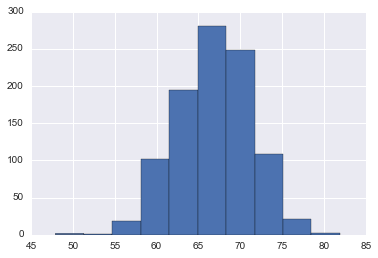

In [6]:
### начнем с роста. Посмотрим на гистограмму, где ожидается увидеть нормальное распределение, что и подтверждается.
### Поэтому со спокойной душой заменяем пропущенные на среднее и проводим standart scaling
data['height'].hist()
data['height'].fillna(data['height'].mean(),inplace=True)
height_scaler = StandardScaler()
data['height'] = height_scaler.fit_transform(data['height'])

C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


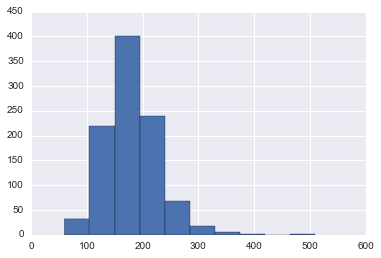

In [7]:
### для веса все аналогично
data['weight'].hist()
data['weight'].fillna(data['weight'].mean(),inplace=True)
weight_scaler = StandardScaler()
data['weight'] = weight_scaler.fit_transform(data['weight'])

In [8]:
### у preop_creat очень тяжелый правый конец. Для более нормального вида прологарифмируем
### Nan-ы заполним медианой, т.к. тяжесть правого хвоста все же останется
data['preop_creat'] = np.log(data['preop_creat'])
data['preop_creat'].fillna(data['preop_creat'].median(),inplace=True)
preop_creat_scaler = StandardScaler()
data['preop_creat'] = preop_creat_scaler.fit_transform(data['preop_creat'])

C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


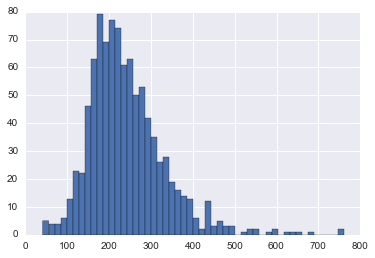

In [9]:
### prop_plate выглядит как нормальное, хотя правый конец все же чуть тяжелее - аналогично preop_creat ставим медиану
data['preop_plate'].hist(bins=50)
data['preop_plate'].fillna(data['preop_plate'].median(),inplace=True)
preop_plate_scaler = StandardScaler()
data['preop_plate'] = preop_plate_scaler.fit_transform(data['preop_plate'])

In [10]:
### посмотрим что у нас по категориальным переменным, все ли они таковыми являются. Как видим, возраст
### очевидно должен быть количественной переменной - сейчас данные в таком виде из-за значения '95++'
for categorial in categorials:
    print(categorial)
    print(data[categorial].value_counts(), '\n')

sex
male      643
female    357
Name: sex, dtype: int64 

race
White                                  755
Black or African American              134
Unknown/Not Reported                    86
Asian                                   17
American Indian or Alaska Native         6
Native Hawaiian or Pacific Islander      2
Name: race, dtype: int64 

age
95++                  21
33.2720546011551       1
79.77218197397178      1
58.836355312036595     1
61.29302743069836      1
59.382436337332926     1
65.87660047693777      1
64.89318497922325      1
63.761818699731066     1
69.9579496549845       1
53.59266679980641      1
45.38747539950123      1
82.2164896774278       1
55.93151079326657      1
58.47794143176917      1
71.33724741885445      1
52.74180909836672      1
62.44003961544497      1
74.63064043780959      1
64.2340122255066       1
62.91202129415914      1
65.95036508534213      1
71.4823705738461       1
58.338390732900265     1
79.24702031117981      1
73.2021738912167       

In [11]:
### Исправляем данные по age, заодное нормализуем
data.age.replace('95++', '95', inplace=True)
data.age = data.age.astype(float)
age_scaler = StandardScaler()
data.age = age_scaler.fit_transform(data.age)

C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [12]:
### и поправляем колонку death - имеет смысл сделать её категориальной, сделав Nan одним из значений
### Подумаем над остальными значениями - очевидно, играет роль именно то, что человек умер, а делать разные категории для
### разных годов будет неправильно, поэтому все года объединим категорией dead
data['death'] = data['death'].astype(str)
data.loc[data['death'] != 'nan', 'death'] = 'dead'

In [13]:
### Поправляем множества признаков
categorials = list(set(categorials) - {'age'})
numerics = list(set(data.columns) - set(categorials))

In [14]:
### С количественными переменными осталось подумать над выбросами. Так как все переменные распределены нормально
### будем считать выбросами за отклонение в 3-сигма, заменив их крайними значениями, а сами выбросы отмечая в новых бинарных
### колонках
data['weight_out'] = (abs(data['weight']) > 3) * 1
data.loc[data['weight'] < -3.0, 'weight'] = -3.0
data.loc[data['weight'] > 3.0, 'weight'] = 3.0

data['height_out'] = (abs(data['height']) > 3) * 1
data.loc[data['height'] < -3.0, 'height'] = -3.0
data.loc[data['height'] > 3.0, 'height'] = 3.0

data['age_out'] = (abs(data['age']) > 3) * 1
data.loc[data['age'] < -3.0, 'age'] = -3.0
data.loc[data['age'] > 3.0, 'age'] = 3.0

data['preop_plate_out'] = (abs(data['preop_plate']) > 3) * 1
data.loc[data['preop_plate'] < -3.0, 'preop_plate'] = -3.0
data.loc[data['preop_plate'] > 3.0, 'preop_plate'] = 3.0

data['preop_creat_out'] = (abs(data['preop_creat']) > 3) * 1
data.loc[data['preop_creat'] < -3.0, 'preop_creat'] = -3.0
data.loc[data['preop_creat'] > 3.0, 'preop_creat'] = 3.0

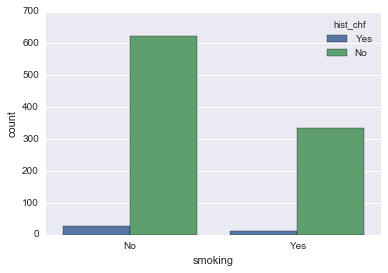

In [21]:
### Глянем также на связь некоторых пар "категориальная-категориальная" переменных
sns.countplot(x='smoking', hue='hist_chf', data=data)

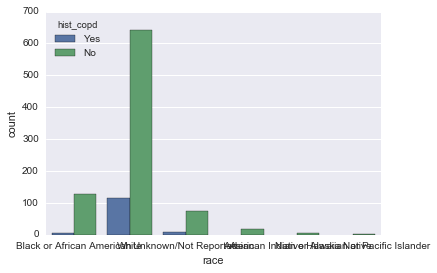

In [20]:
sns.countplot(x='smoking', hue='hist_', data=data)

# Визуализация

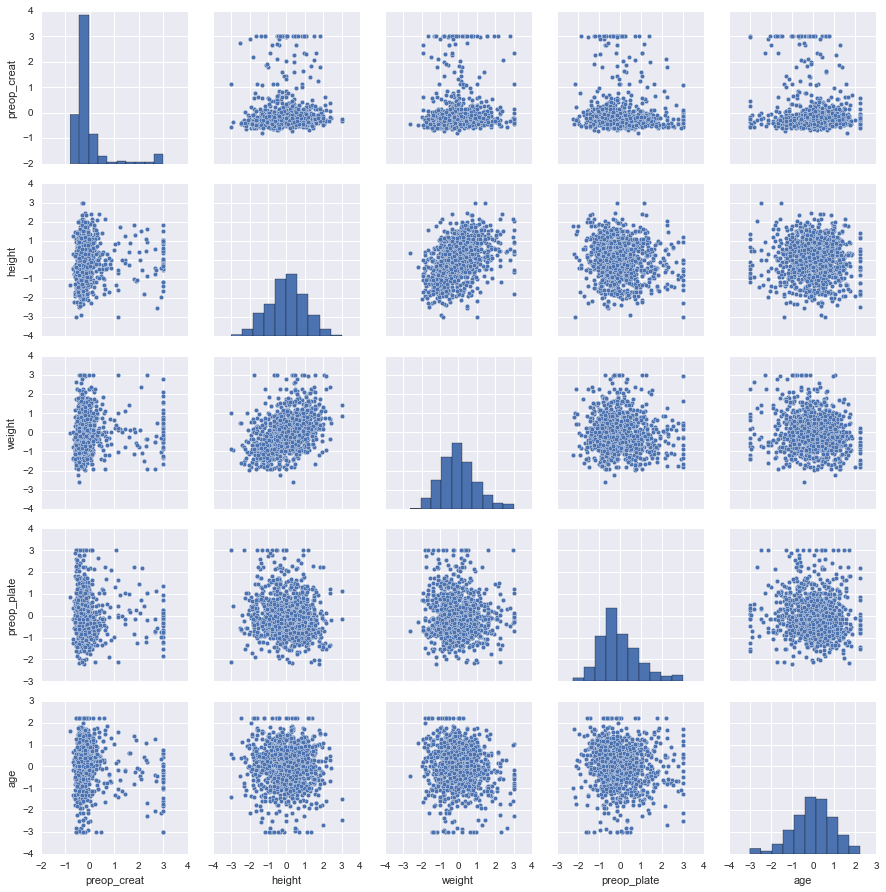

In [123]:
### теперь посмотрим на пэерплоты для наших количественных признаков
sns.pairplot(data[numerics])

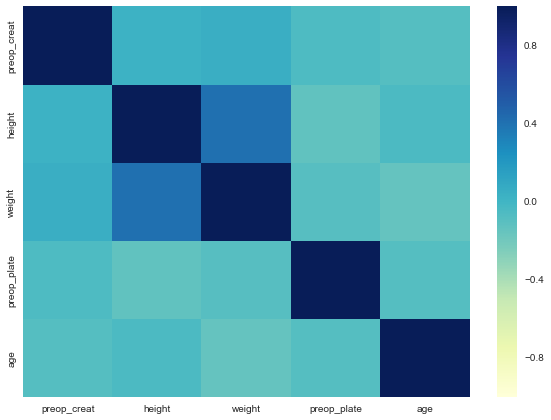

In [124]:
### также посмотрим на матрицу корреляции. Особых зависимостей не наблюдается, кроме достаточно очевидной между весом и ростом
corr = data[numerics].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

C:\Users\Lampard\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


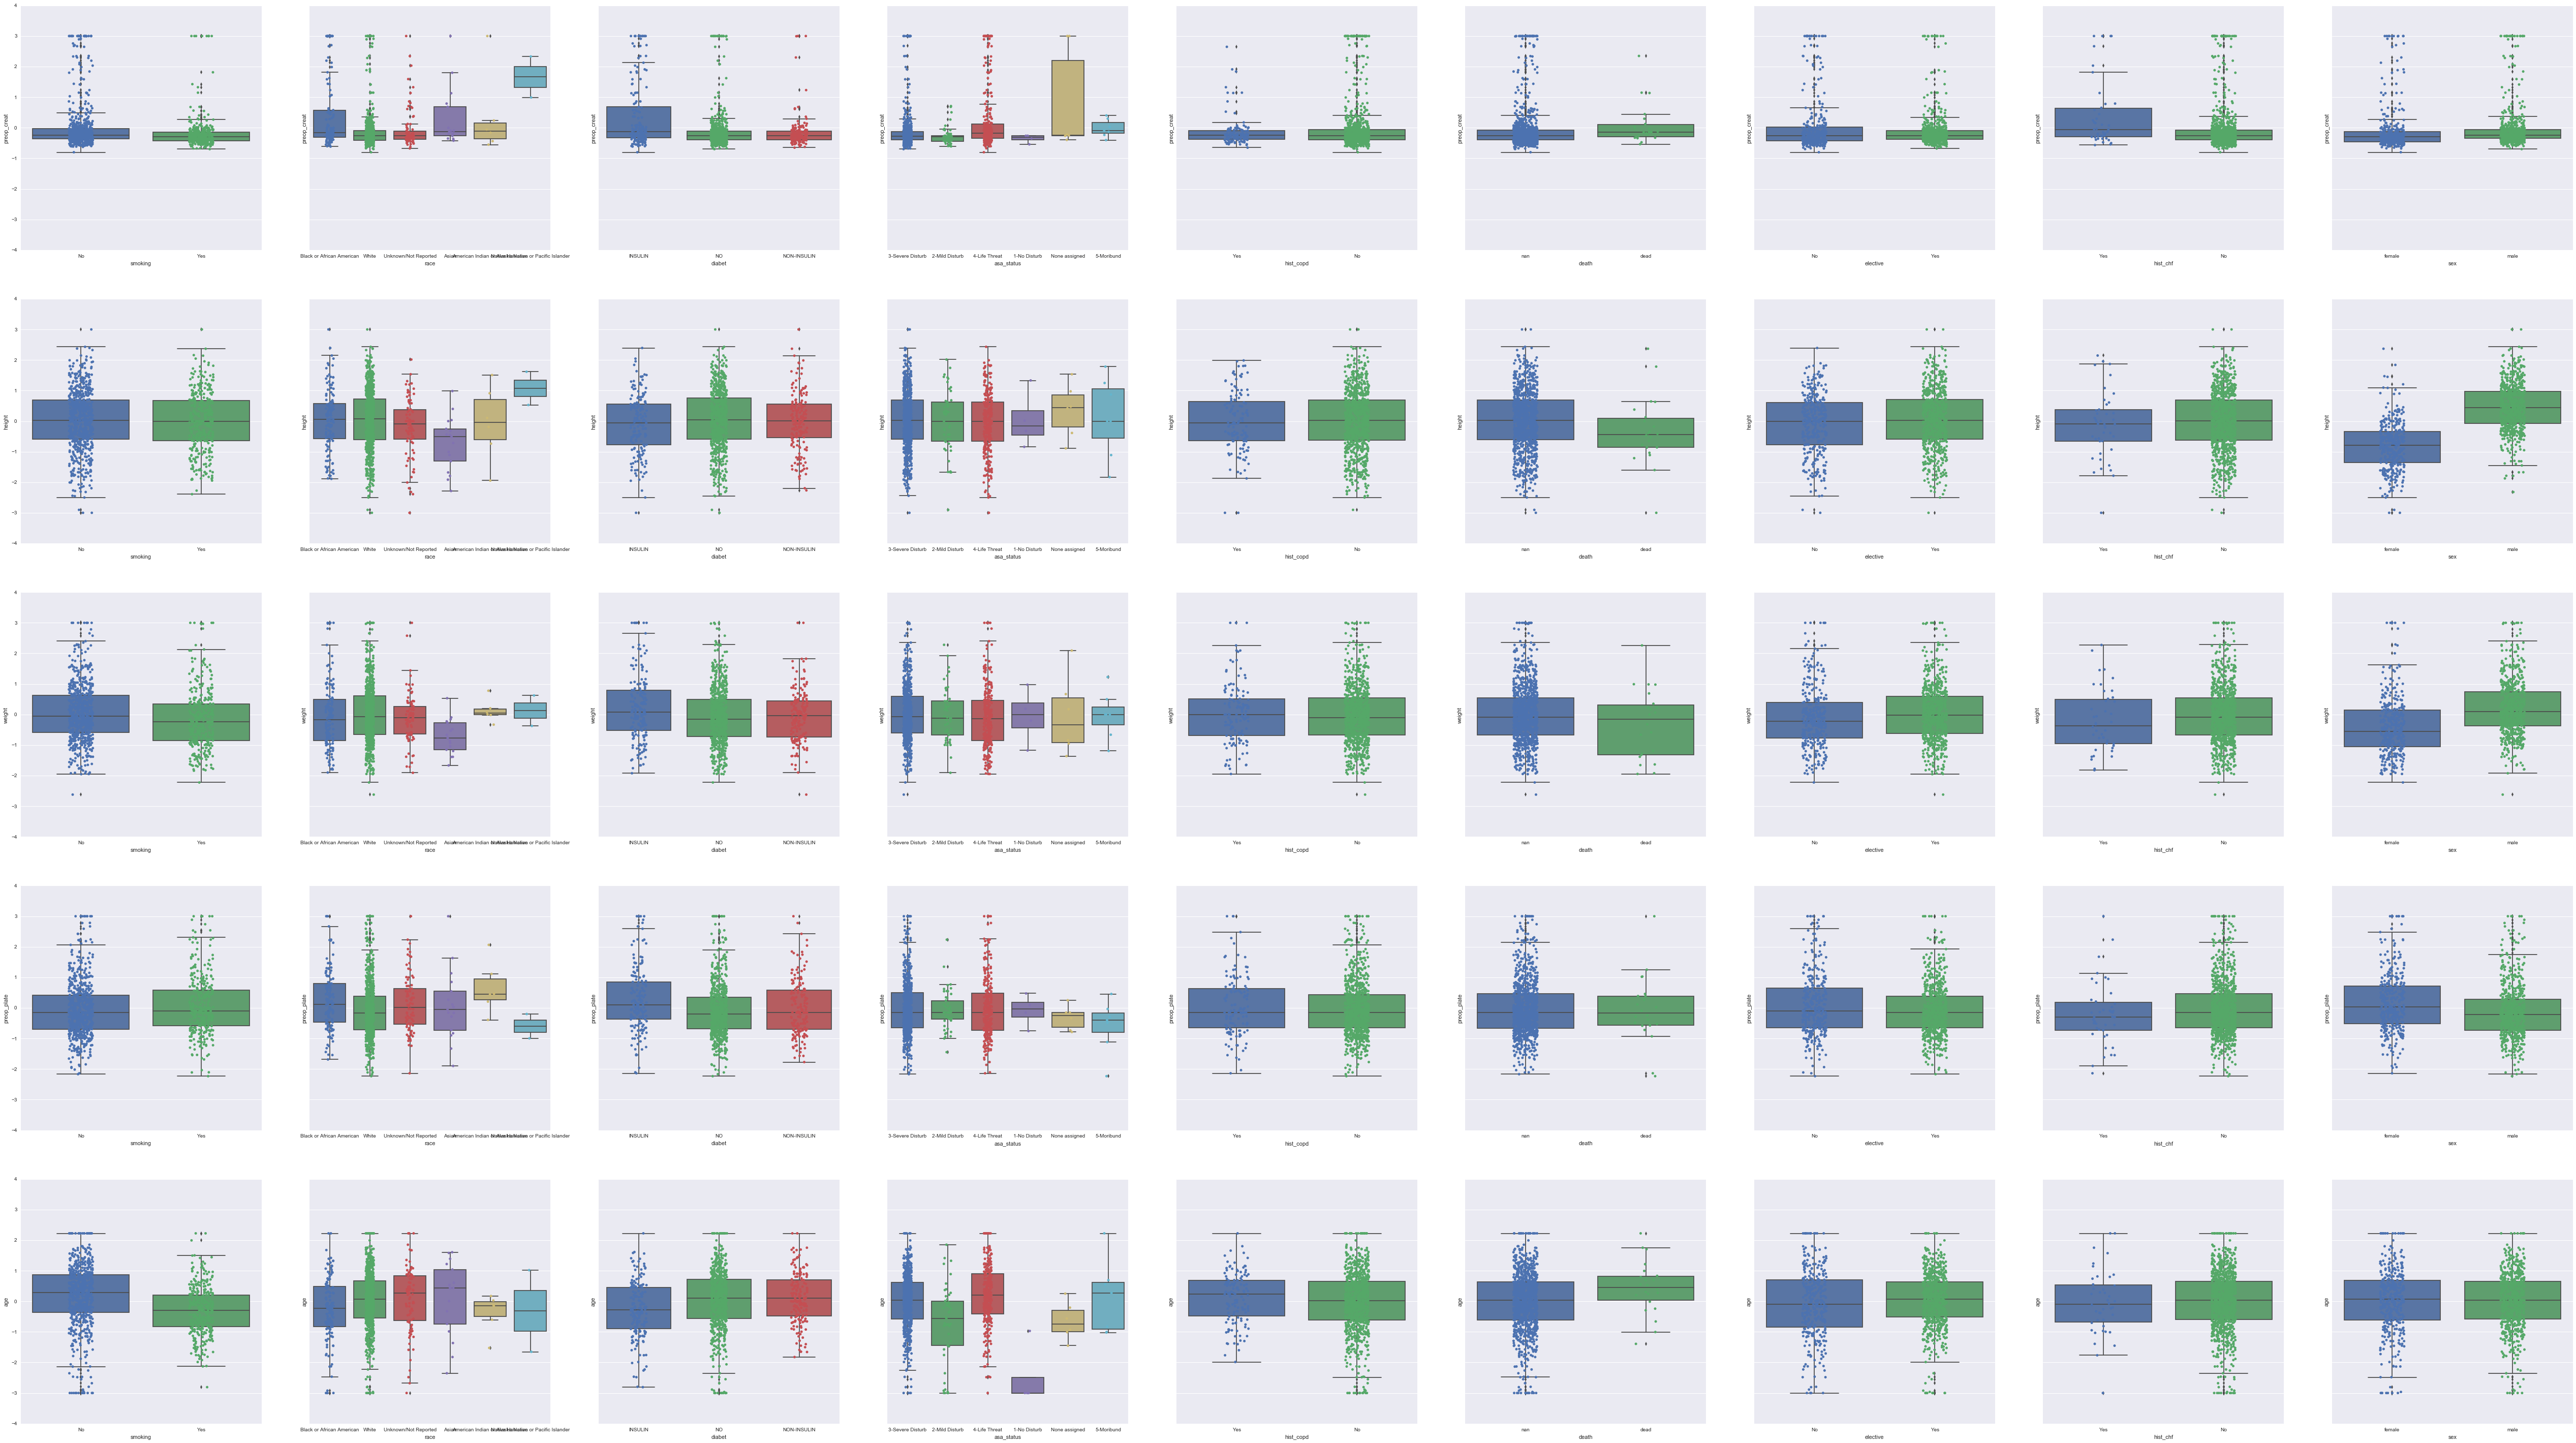

In [125]:
### и наконец взглянем на взаимодействие категориальных и количественных переменных
fig, axes = plt.subplots(5, 9, sharey=True, figsize=(90, 50))
for i in range(len(numerics)):
    for j in range(len(categorials)):
        sns.boxplot(categorials[j], numerics[i], data=data, ax=axes[i, j])
        sns.stripplot(categorials[j], numerics[i], data=data, jitter=True, ax=axes[i, j])
        axes[i, j].legend()
        axes[i, j].set_xlabel(categorials[j])
        axes[i, j].set_ylabel(numerics[i])

# Предсказание

In [56]:
### Попробуем потренировать линейную модель. Поэтому для начала приводим в нормальный вид все категориальные переменные

### бинарные переменные факторизуем
data['sex'] = data['sex'].factorize()[0]
data['elective'] = data['elective'].factorize()[0]
data['death'] = data['death'].factorize()[0]
data['hist_chf'] = data['hist_chf'].factorize()[0]
data['hist_copd'] = data['hist_copd'].factorize()[0]

### one-hot encoding для категориальных
data = pd.get_dummies(data, columns=['race', 'diabet', 'asa_status'])

In [97]:
### Разделяем на data/target и train/test
y = data['smoking'].factorize()[0]
X = data.drop(['smoking'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
### Попробуем логистическую регрессию из коробки
lr = LogisticRegression()

lr_cv = StratifiedKFold(5, random_state=0)
cross_val = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=lr_cv)

In [99]:
cross_val.mean()

0.68876870190241812

In [100]:
### проверяем еще и на тесте - даже лучше
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.70999999999999996

In [101]:
### попробуем поменять параметры, воспользуемся грид-сечем для просмотра общей статистики
### смотрим, как влияет разный тип регуляризации и ее сила, а также попробуем добавить взвешенность классов
### solver трогать не будем, посмотрим liblinear должен лучше работать на маленьких датасетах
params = {'penalty': ['l1', 'l2'],
         'C': [0.001, 0.1, 1, 5, 25, 100],
         'class_weight': [None, 'balanced']}
gscv = GridSearchCV(lr, params, scoring='accuracy', cv=lr_cv.get_n_splits())

In [102]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced'], 'C': [0.001, 0.1, 1, 5, 25, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [103]:
### видим, что слишком сильная и слишком слабая регуляризаций ничего путного не дают, при этом по самому типу где-то лучше l1, 
### где-то l2. Попробуем посмотреть плотнее в области C=1
gscv.grid_scores_

[mean: 0.64500, std: 0.00164, params: {'penalty': 'l1', 'class_weight': None, 'C': 0.001},
 mean: 0.64500, std: 0.00164, params: {'penalty': 'l2', 'class_weight': None, 'C': 0.001},
 mean: 0.64500, std: 0.00164, params: {'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.001},
 mean: 0.64750, std: 0.04300, params: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.001},
 mean: 0.66875, std: 0.02420, params: {'penalty': 'l1', 'class_weight': None, 'C': 0.1},
 mean: 0.67250, std: 0.01462, params: {'penalty': 'l2', 'class_weight': None, 'C': 0.1},
 mean: 0.66000, std: 0.04886, params: {'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.1},
 mean: 0.66125, std: 0.04298, params: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.1},
 mean: 0.69000, std: 0.01239, params: {'penalty': 'l1', 'class_weight': None, 'C': 1},
 mean: 0.68875, std: 0.00936, params: {'penalty': 'l2', 'class_weight': None, 'C': 1},
 mean: 0.67375, std: 0.05368, params: {'penalty': 'l1', 'class_weight': 'balanced'

In [143]:
params1 = {'penalty': ['l1', 'l2'],
         'C': [0.5, 0.75, 1, 1.25, 1.5, 2, 3]}
gscv1 = GridSearchCV(lr, params1, scoring='accuracy', cv=lr_cv.get_n_splits())
gscv1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.5, 0.75, 1, 1.25, 1.5, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [144]:
### да, как видим l1 здесь работает получше, что неудивительно - у нас достаточно много переменных полученных от категориальных,
### есть смысл их повыбрасывать
gscv1.grid_scores_

[mean: 0.68125, std: 0.01358, params: {'penalty': 'l1', 'C': 0.5},
 mean: 0.68250, std: 0.00934, params: {'penalty': 'l2', 'C': 0.5},
 mean: 0.68250, std: 0.01288, params: {'penalty': 'l1', 'C': 0.75},
 mean: 0.68875, std: 0.00936, params: {'penalty': 'l2', 'C': 0.75},
 mean: 0.69000, std: 0.01239, params: {'penalty': 'l1', 'C': 1},
 mean: 0.68875, std: 0.00936, params: {'penalty': 'l2', 'C': 1},
 mean: 0.69125, std: 0.01282, params: {'penalty': 'l1', 'C': 1.25},
 mean: 0.68625, std: 0.01371, params: {'penalty': 'l2', 'C': 1.25},
 mean: 0.69000, std: 0.01220, params: {'penalty': 'l1', 'C': 1.5},
 mean: 0.68250, std: 0.01464, params: {'penalty': 'l2', 'C': 1.5},
 mean: 0.69000, std: 0.01476, params: {'penalty': 'l1', 'C': 2},
 mean: 0.68500, std: 0.01641, params: {'penalty': 'l2', 'C': 2},
 mean: 0.68750, std: 0.01599, params: {'penalty': 'l1', 'C': 3},
 mean: 0.68375, std: 0.01593, params: {'penalty': 'l2', 'C': 3}]

In [148]:
### Выберем самый большой по модулю коэффициент - здесь он 12-ый
gscv1.estimator.coef_

array([[ 0.20871696, -0.79363978, -0.00868544,  0.03999368, -0.40150297,
        -0.06070839,  0.01967758, -0.74746491, -0.02613297, -0.7894798 ,
         0.53893283, -0.70118618, -2.1450834 , -0.12122469,  1.05543104,
         0.15396821, -0.31531703,  0.41591606, -0.28059199, -0.47469269,
         0.14381062, -0.3298574 ,  0.04596873, -0.07301815, -0.86792279,
        -0.98651231,  0.12549405,  0.19682492,  0.81776923,  0.35744009]])

In [149]:
### самый большой вес имеет выброс по возрасту
X.columns[12]

'age_out'

In [137]:
### мы получили скор порядка 0.69 для экьюраси, что может показаться хорошим результатом, если не вспоминать, что классы
### имеют небольшой дизбаланс примерно именно на таком уровне
data['smoking'].value_counts()

No     652
Yes    348
Name: smoking, dtype: int64

In [150]:
### поэтому давайте все-таки попробуем более разумную метрику - f1. Не будем выбирать между precision и recall что-то одно,
### т.к. нет четкой постановки задачи, по которой можно было бы определить критичность FP и FN ошибок
### как видим, здесь уже сильная регуляризация и учет баланса классов играют свою роль
params = {'penalty': ['l1', 'l2'],
         'C': [0.001, 0.1, 1, 5, 25, 100],
         'class_weight': [None, 'balanced']}
gscv = GridSearchCV(lr, params, scoring='f1', cv=lr_cv.get_n_splits())
gscv.fit(X_train, y_train)
gscv.grid_scores_

C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lampard\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113:

[mean: 0.00000, std: 0.00000, params: {'penalty': 'l1', 'class_weight': None, 'C': 0.001},
 mean: 0.00000, std: 0.00000, params: {'penalty': 'l2', 'class_weight': None, 'C': 0.001},
 mean: 0.00000, std: 0.00000, params: {'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.001},
 mean: 0.57791, std: 0.04962, params: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.001},
 mean: 0.34955, std: 0.06300, params: {'penalty': 'l1', 'class_weight': None, 'C': 0.1},
 mean: 0.37926, std: 0.00934, params: {'penalty': 'l2', 'class_weight': None, 'C': 0.1},
 mean: 0.57012, std: 0.06632, params: {'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.1},
 mean: 0.57517, std: 0.05902, params: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.1},
 mean: 0.46740, std: 0.02329, params: {'penalty': 'l1', 'class_weight': None, 'C': 1},
 mean: 0.46393, std: 0.02349, params: {'penalty': 'l2', 'class_weight': None, 'C': 1},
 mean: 0.58981, std: 0.06999, params: {'penalty': 'l1', 'class_weight': 'balanced'